In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('C://Users/Gaurishankar/Desktop/stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.shape

(5110, 12)

In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


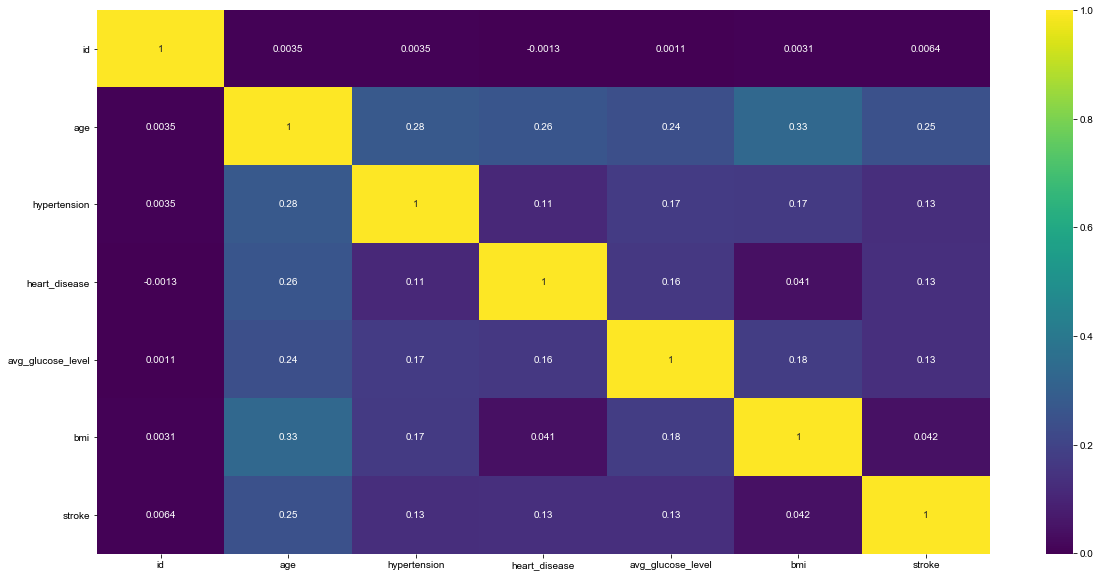

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
sns.set()

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.bmi.isnull().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

In [11]:
df['bmi'].fillna(np.mean(df['bmi']), inplace=True)

In [12]:
df['bmi'].isnull().sum()

0

In [13]:
scaler=StandardScaler()

In [14]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [15]:
le=LabelEncoder()

In [16]:
df['work_type']=le.fit_transform(df['work_type'])

In [17]:
df['work_type'].unique()

array([2, 3, 0, 4, 1], dtype=int64)

In [18]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [19]:
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [20]:
df['smoking_status'].unique()

array([1, 2, 3, 0], dtype=int64)

In [21]:
X=df[['age', 'hypertension', 'heart_disease','work_type','avg_glucose_level','bmi','smoking_status']]
y=df['stroke']

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

In [23]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [24]:
model=RandomForestClassifier(n_estimators=20, random_state=0)

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [26]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
A=accuracy_score(y_test, y_pred)
A

0.9491392801251957

In [28]:
print('model Accuracy score is: ', np.round(A, 2)*100,'%')

model Accuracy score is:  95.0 %


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.50      0.03      0.06        65

    accuracy                           0.95      1278
   macro avg       0.73      0.51      0.52      1278
weighted avg       0.93      0.95      0.93      1278



In [30]:
print(confusion_matrix(y_test, y_pred)) 

[[1211    2]
 [  63    2]]


In [31]:
import sklearn.externals
import joblib
joblib.dump(model, 'C://users/Gaurishankar/Desktop/Stroke.pkl')

['C://users/Gaurishankar/Desktop/Stroke.pkl']

In [32]:
X_train.shape

(3832, 7)